# Exercises: Regression - FEATURE ENGINEERING
<a href = "https://ds.codeup.com/regression/feature-engineering/#exercises">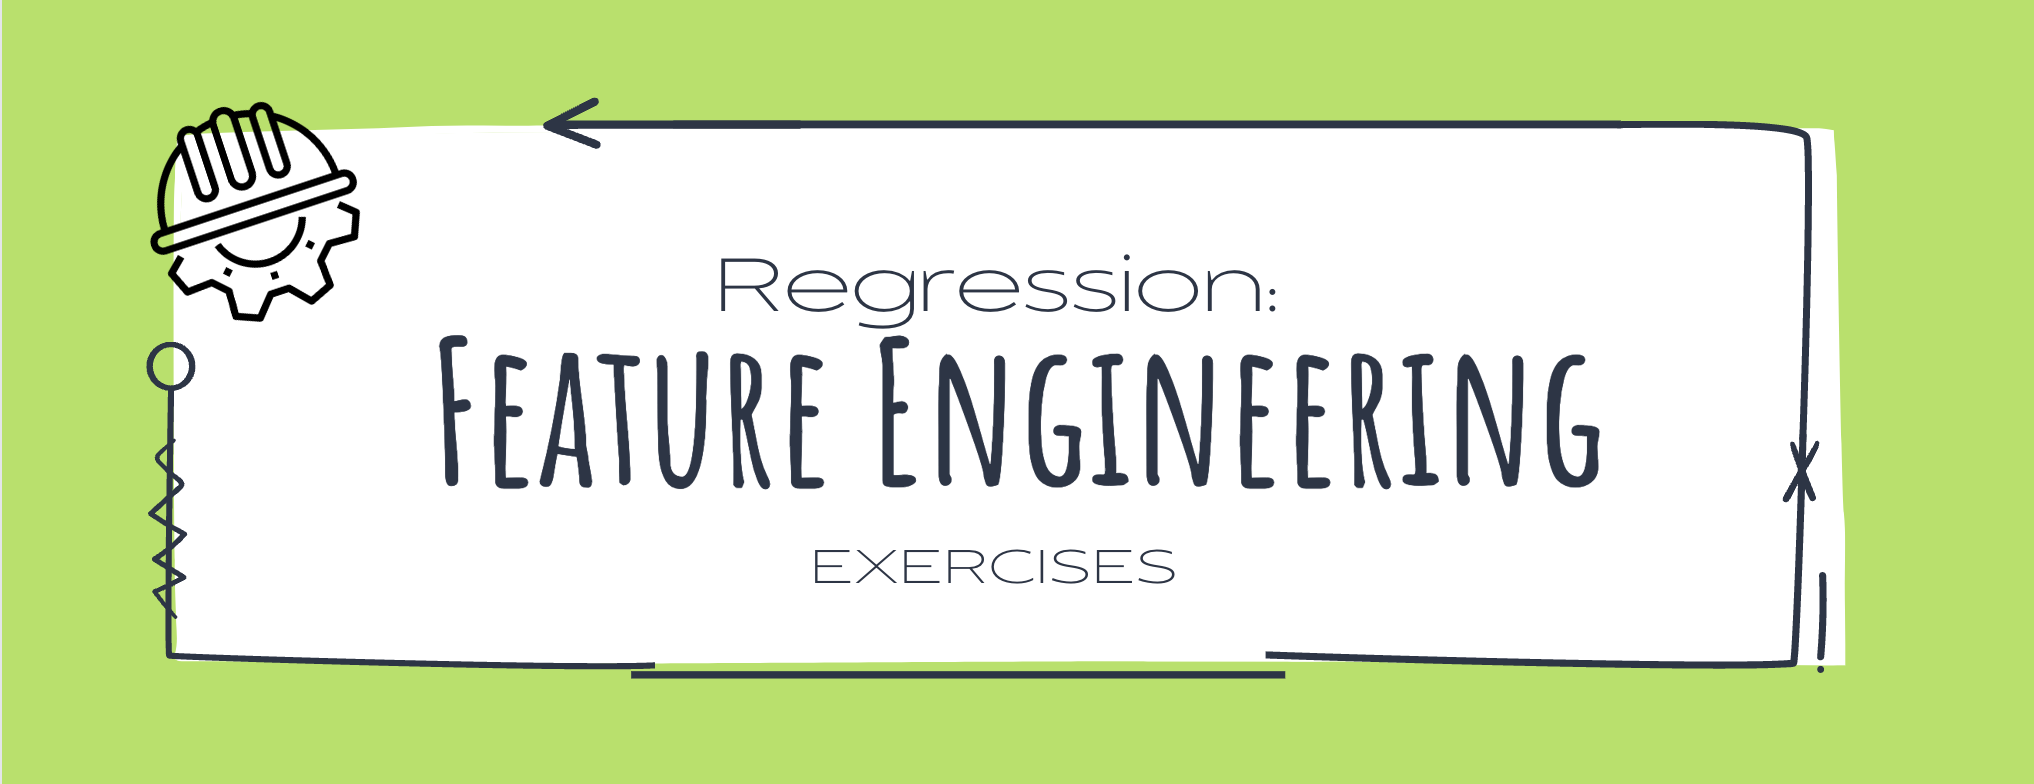</a>

<hr style="border:2px solid gray">

## Before We Begin The Exercises

<div class="alert alert-block alert-info">

#### Note:


- We should be at the point where we are creating functions that can be used over and over again.
    
    
- Something that we will consistently do is split our data into train, validate and test sets.
 
- We will also (often times) be isolating our target variables into y_train, y_validate and y_tests.

**Let's make these functions reusable!**
    
</div>

In [1]:
#create a function to split our data
def split_data(df):
    '''
    This function takes in a dataframe and splits the data,
    returning three pandas dataframes, train, test, and validate
    '''
    
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=123)

    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test

In [2]:
#create a function to isolate the target variable
def X_y_split(df, target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    train, validate, test = split_data(df)

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'''
    X_train -> {X_train.shape}'
    X_validate -> {X_validate.shape}'
    X_test -> {X_test.shape}''') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

<div class="alert alert-block alert-info">

#### Note:
    
- By <u>not</u> hardcoding our dataframe and target, we can use these functions for other datasets and projects.
    
</div>

___
Do your work for this exercise in a jupyter notebook named `feature_engineering` within the `regression-exercises` repo. Add, commit, and push your work.

# 1. Load the `tips` dataset.

In [ ]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd
import numpy as np

#import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from pydataset import data

#sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">

#### Note:
    
We may choose to create a function that groups our data by datatype for us. 
    
This way we don't have to recreate this action each time.
    
</div>

In [12]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols


def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols


## 1.a Create a column named `price_per_person`. This should be the total bill divided by the party size.

## 1.b Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

___
<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
We need to create dummy variables for two reasons:

<br>
    
- In order to use RFE, we cannot have 'object' datatypes
<br>
- We will also need dummy variables in order to scale. The scaler does not know what objects are; It doesn't understand what "Female" or "Saturday" mean.

</div>

## 1.c Use select k best to select the top 2 features for predicting tip amount. What are they?

## 1.d Use recursive feature elimination to select the top 2 features for tip amount. What are they?

## 1.e Why do you think `SelectKBest` and recursive feature elimination might give different answers for the top features? 

Does this change as you change the number of features you are selecting?

# 2. Write a function named `select_kbest` that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the `SelectKBest` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.

# 3. Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.



# 4. Load the `swiss` dataset and use all the other features to predict `Fertility`. Find the top 3 features using both select k best and recursive feature elimination (*use the functions you just built to help you out*).